In [1]:
# ===============================
# 1. Import Libraries
# ===============================
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc
from sklearn.metrics import ConfusionMatrixDisplay, RocCurveDisplay
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.utils.multiclass import unique_labels

# ML Models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
!pip install catboost
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier

# DL Models
!pip install tensorflow
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, GRU, Conv1D, Flatten, Dropout
from tensorflow.keras.layers import Bidirectional
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 MB 7.5 MB/s eta 0:00:00


In [2]:
#  upload the CSV file
from google.colab import files
print("Please upload your 'Sleep_health_and_lifestyle_dataset.csv' file:")
uploaded = files.upload()



Please upload your 'Sleep_health_and_lifestyle_dataset.csv' file:


Saving Sleep_health_and_lifestyle_dataset.csv to Sleep_health_and_lifestyle_dataset.csv


In [3]:
# Load and inspect data

file_path = "/content/Sleep_health_and_lifestyle_dataset.csv"
df = pd.read_csv(file_path)

print("Initial Data Overview:")
print(df.head(), "\n")
print("Column Information:")
print(df.info(), "\n")
print("Null Value Count:")
print(df.isnull().sum())

Initial Data Overview:
   Person ID Gender  Age            Occupation  Sleep Duration  \
0          1   Male   27     Software Engineer             6.1   
1          2   Male   28                Doctor             6.2   
2          3   Male   28                Doctor             6.2   
3          4   Male   28  Sales Representative             5.9   
4          5   Male   28  Sales Representative             5.9   

   Quality of Sleep  Physical Activity Level  Stress Level BMI Category  \
0                 6                       42             6   Overweight   
1                 6                       60             8       Normal   
2                 6                       60             8       Normal   
3                 4                       30             8        Obese   
4                 4                       30             8        Obese   

  Blood Pressure  Heart Rate  Daily Steps Sleep Disorder  
0         126/83          77         4200            NaN  
1         1

In [ ]:
# 3. Null Value Handling
# ===============================
#df.fillna(method='ffill', inplace=True)

In [4]:
df['Sleep Disorder'].value_counts()

,count
Sleep Disorder,
Sleep Apnea,78
Insomnia,77


In [5]:
df['Sleep Disorder'].unique()

array([nan, 'Sleep Apnea', 'Insomnia'], dtype=object)

In [6]:
df['Sleep Disorder'] = df['Sleep Disorder'].astype(str)
df['Sleep Disorder'] = df['Sleep Disorder'].replace('None', 'No Disorder')
df['Sleep Disorder'].unique()

array(['nan', 'Sleep Apnea', 'Insomnia'], dtype=object)

In [7]:
df['Sleep Disorder'] = df['Sleep Disorder'].replace('nan', 'No Disorder')
df['Sleep Disorder'].unique()

array(['No Disorder', 'Sleep Apnea', 'Insomnia'], dtype=object)

In [8]:
df['Sleep Disorder'].value_counts()

,count
Sleep Disorder,
No Disorder,219
Sleep Apnea,78
Insomnia,77


In [9]:
# Separate features and target
X = df.drop("Sleep Disorder", axis=1)
y = df["Sleep Disorder"]

In [10]:
# 4. Encode Categorical Columns
# ===============================
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)
label_encoders = {}
for col in X.columns:
    if X[col].dtype == 'object':
        le = LabelEncoder()
        X[col] = le.fit_transform(X[col].astype(str))
        label_encoders[col] = le
        print(f"Encoded {col}: {dict(zip(le.classes_, le.transform(le.classes_)))}")


Encoded Gender: {'Female': np.int64(0), 'Male': np.int64(1)}
Encoded Occupation: {'Accountant': np.int64(0), 'Doctor': np.int64(1), 'Engineer': np.int64(2), 'Lawyer': np.int64(3), 'Manager': np.int64(4), 'Nurse': np.int64(5), 'Sales Representative': np.int64(6), 'Salesperson': np.int64(7), 'Scientist': np.int64(8), 'Software Engineer': np.int64(9), 'Teacher': np.int64(10)}
Encoded BMI Category: {'Normal': np.int64(0), 'Normal Weight': np.int64(1), 'Obese': np.int64(2), 'Overweight': np.int64(3)}
Encoded Blood Pressure: {'115/75': np.int64(0), '115/78': np.int64(1), '117/76': np.int64(2), '118/75': np.int64(3), '118/76': np.int64(4), '119/77': np.int64(5), '120/80': np.int64(6), '121/79': np.int64(7), '122/80': np.int64(8), '125/80': np.int64(9), '125/82': np.int64(10), '126/83': np.int64(11), '128/84': np.int64(12), '128/85': np.int64(13), '129/84': np.int64(14), '130/85': np.int64(15), '130/86': np.int64(16), '131/86': np.int64(17), '132/87': np.int64(18), '135/88': np.int64(19), '135

In [11]:
print("Columns with object dtype:", X.select_dtypes(include=['object']).columns)

Columns with object dtype: Index([], dtype='object')


In [12]:
#Dta balancing & Splitting & Scaling

from imblearn.combine import SMOTEENN
sm = SMOTEENN()
X_res, y_res = sm.fit_resample(X, y)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.2, random_state=42)

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)



===== Logistic Regression =====
Accuracy: 0.9808
              precision    recall  f1-score   support

           0       0.95      1.00      0.98        42
           1       1.00      0.93      0.96        29
           2       1.00      1.00      1.00        33

    accuracy                           0.98       104
   macro avg       0.98      0.98      0.98       104
weighted avg       0.98      0.98      0.98       104



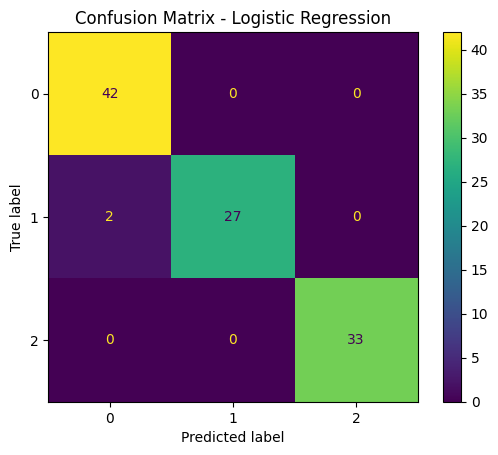

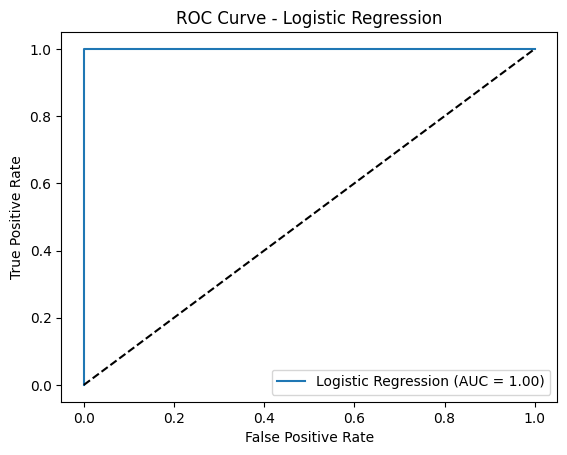


===== Decision Tree =====
Accuracy: 0.9712
              precision    recall  f1-score   support

           0       0.95      0.98      0.96        42
           1       1.00      0.93      0.96        29
           2       0.97      1.00      0.99        33

    accuracy                           0.97       104
   macro avg       0.97      0.97      0.97       104
weighted avg       0.97      0.97      0.97       104



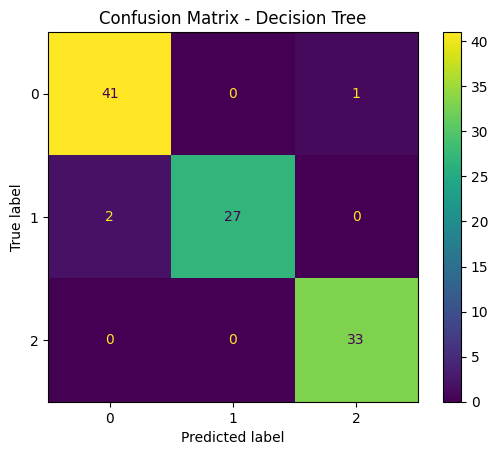

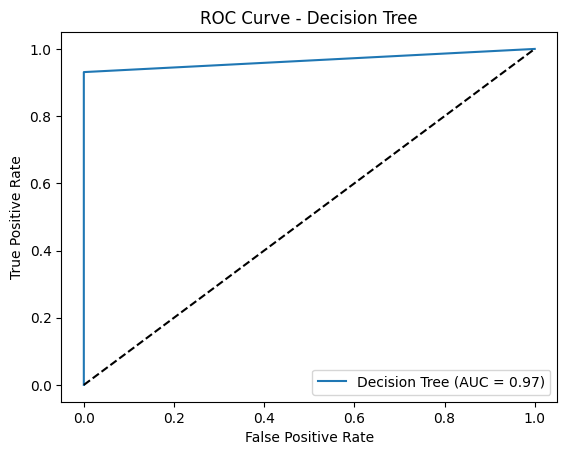


===== Random Forest =====
Accuracy: 0.9904
              precision    recall  f1-score   support

           0       1.00      0.98      0.99        42
           1       1.00      1.00      1.00        29
           2       0.97      1.00      0.99        33

    accuracy                           0.99       104
   macro avg       0.99      0.99      0.99       104
weighted avg       0.99      0.99      0.99       104



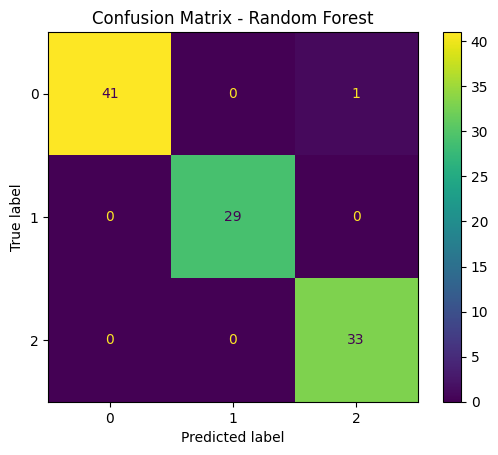

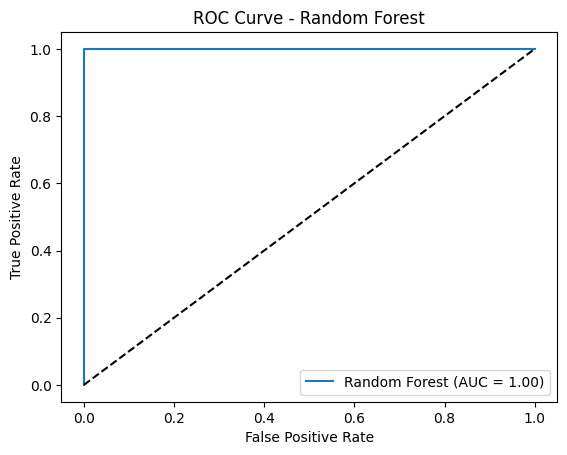

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000208 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 275
[LightGBM] [Info] Number of data points in the train set: 415, number of used features: 12
[LightGBM] [Info] Start training from score -1.145477
[LightGBM] [Info] Start training from score -1.108298
[LightGBM] [Info] Start training from score -1.044672
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No fur

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


              precision    recall  f1-score   support

           0       0.95      0.98      0.96        42
           1       1.00      0.93      0.96        29
           2       0.97      1.00      0.99        33

    accuracy                           0.97       104
   macro avg       0.97      0.97      0.97       104
weighted avg       0.97      0.97      0.97       104



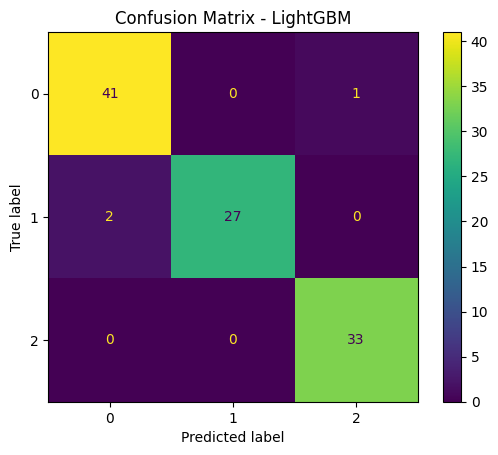

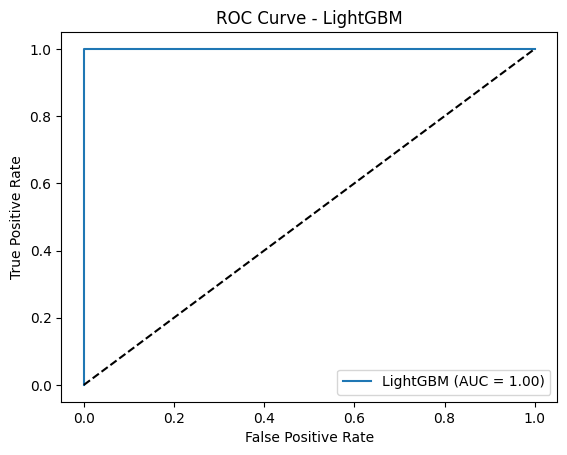


===== AdaBoost =====
Accuracy: 0.9712
              precision    recall  f1-score   support

           0       1.00      0.93      0.96        42
           1       0.97      1.00      0.98        29
           2       0.94      1.00      0.97        33

    accuracy                           0.97       104
   macro avg       0.97      0.98      0.97       104
weighted avg       0.97      0.97      0.97       104



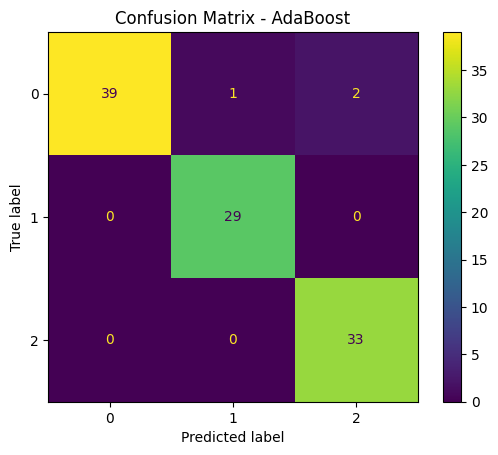

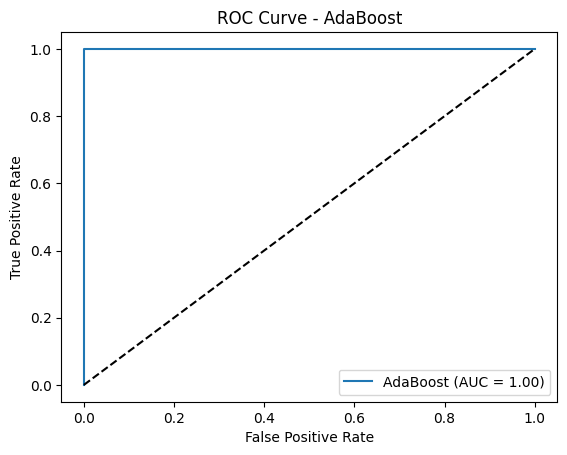


===== SVM =====
Accuracy: 0.9712
              precision    recall  f1-score   support

           0       0.95      0.98      0.96        42
           1       1.00      0.93      0.96        29
           2       0.97      1.00      0.99        33

    accuracy                           0.97       104
   macro avg       0.97      0.97      0.97       104
weighted avg       0.97      0.97      0.97       104



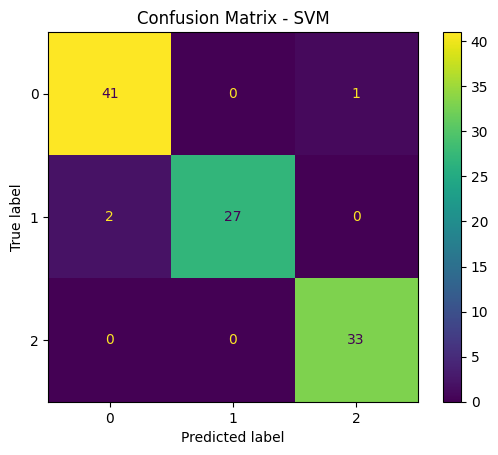

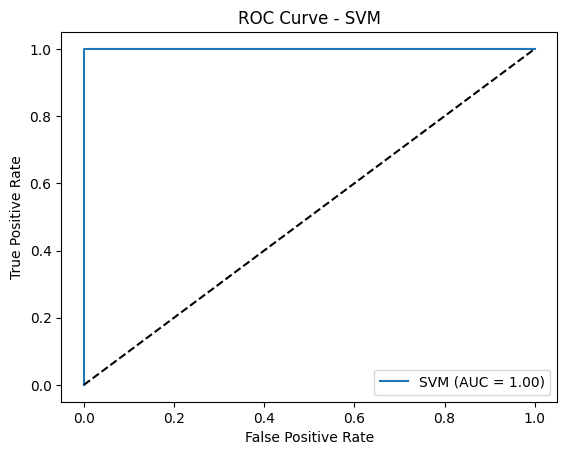


===== Naive Bayes =====
Accuracy: 0.9712
              precision    recall  f1-score   support

           0       0.95      0.98      0.96        42
           1       0.96      0.93      0.95        29
           2       1.00      1.00      1.00        33

    accuracy                           0.97       104
   macro avg       0.97      0.97      0.97       104
weighted avg       0.97      0.97      0.97       104



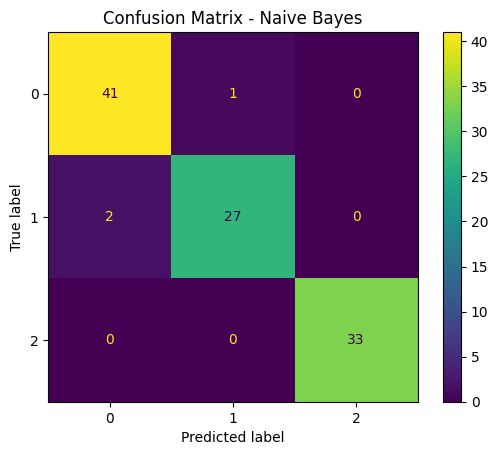

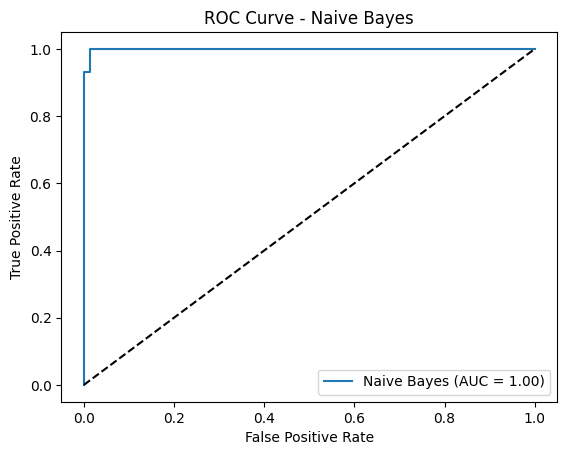


===== KNN =====
Accuracy: 0.9808
              precision    recall  f1-score   support

           0       0.95      1.00      0.98        42
           1       1.00      0.93      0.96        29
           2       1.00      1.00      1.00        33

    accuracy                           0.98       104
   macro avg       0.98      0.98      0.98       104
weighted avg       0.98      0.98      0.98       104



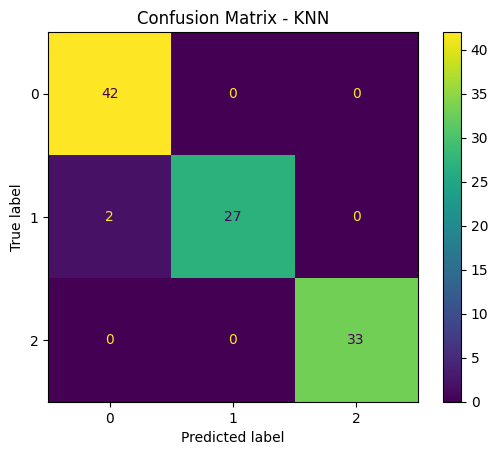

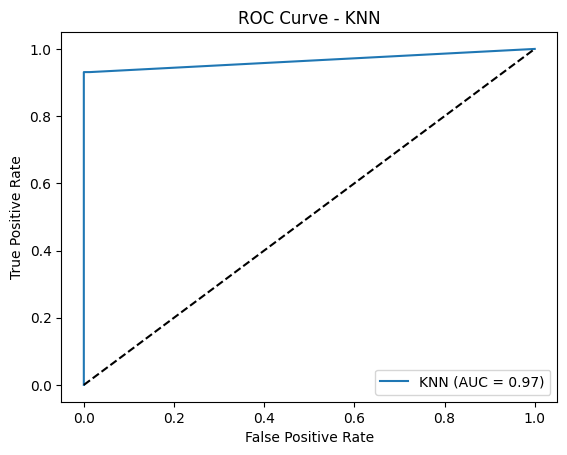


===== XGBoost =====
Accuracy: 0.9712
              precision    recall  f1-score   support

           0       0.95      0.98      0.96        42
           1       1.00      0.93      0.96        29
           2       0.97      1.00      0.99        33

    accuracy                           0.97       104
   macro avg       0.97      0.97      0.97       104
weighted avg       0.97      0.97      0.97       104



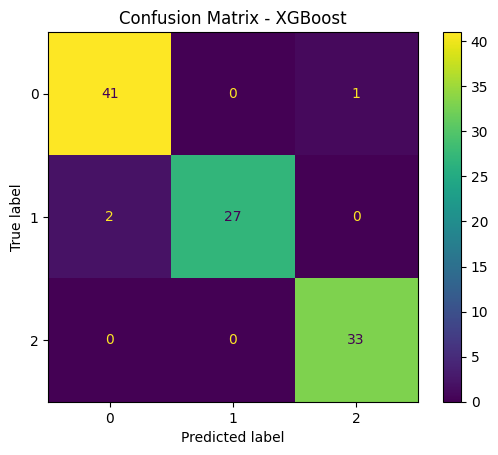

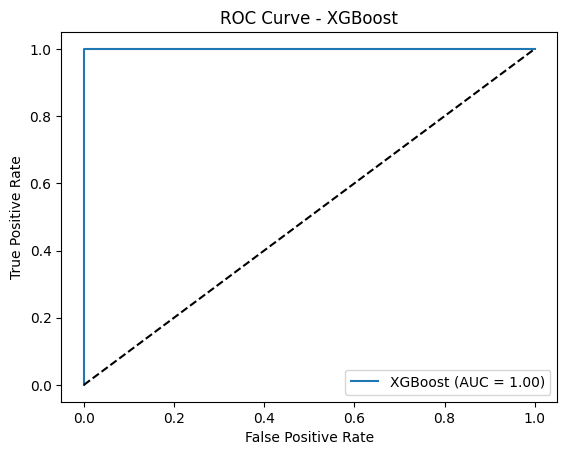


===== CatBoost =====
Accuracy: 0.9712
              precision    recall  f1-score   support

           0       0.95      0.98      0.96        42
           1       1.00      0.93      0.96        29
           2       0.97      1.00      0.99        33

    accuracy                           0.97       104
   macro avg       0.97      0.97      0.97       104
weighted avg       0.97      0.97      0.97       104



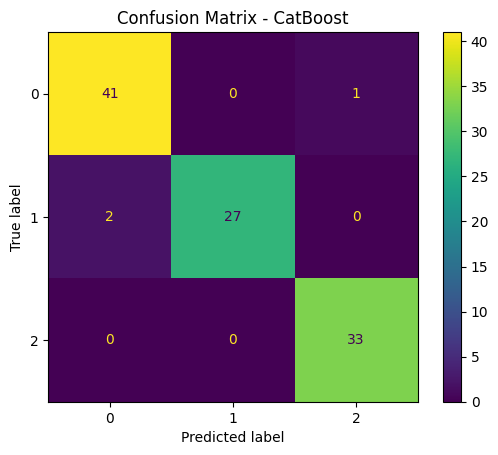

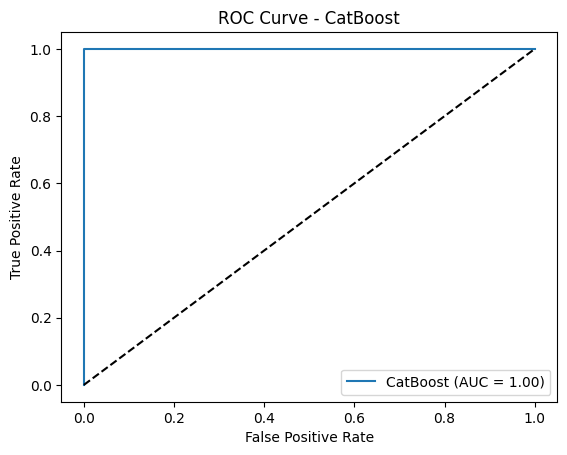

In [13]:
# 7. Train ML Models
# ===============================
models_ml = {
    "Logistic Regression": LogisticRegression(max_iter=200),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "LightGBM": LGBMClassifier(),
    "AdaBoost": AdaBoostClassifier(),
    "SVM": SVC(probability=True),
    "Naive Bayes": GaussianNB(),
    "KNN": KNeighborsClassifier(),
    "XGBoost": XGBClassifier(eval_metric='logloss'),
    "CatBoost": CatBoostClassifier(verbose=0)
}

results = {}
y_test_onehot = to_categorical(y_test)

def evaluate_model(name, y_true, y_pred, y_pred_proba):
    acc = accuracy_score(y_true, y_pred)
    print(f"\n===== {name} =====")
    print(f"Accuracy: {acc:.4f}")
    print(classification_report(y_true, y_pred))
    ConfusionMatrixDisplay(confusion_matrix(y_true, y_pred)).plot()
    plt.title(f"Confusion Matrix - {name}")
    plt.show()

    fpr, tpr, _ = roc_curve(y_true, y_pred_proba[:, 1], pos_label=1)
    plt.plot(fpr, tpr, label=f"{name} (AUC = {auc(fpr, tpr):.2f})")
    plt.plot([0, 1], [0, 1], 'k--')
    plt.title(f"ROC Curve - {name}")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.legend()
    plt.show()

    return acc

for name, model in models_ml.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_pred_proba = model.predict_proba(X_test)
    acc = evaluate_model(name, y_test, y_pred, y_pred_proba)
    results[name] = acc


===== Training MLP =====


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 

===== MLP =====
Accuracy: 0.9712
              precision    recall  f1-score   support

           0       0.93      1.00      0.97        42
           1       1.00      0.93      0.96        29
           2       1.00      0.97      0.98        33

    accuracy                           0.97       104
   macro avg       0.98      0.97      0.97       104
weighted avg       0.97      0.97      0.97       104



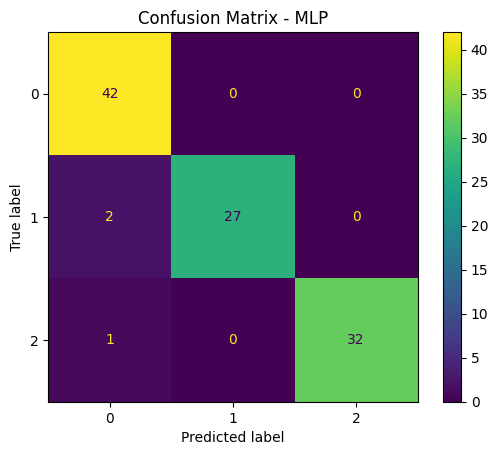

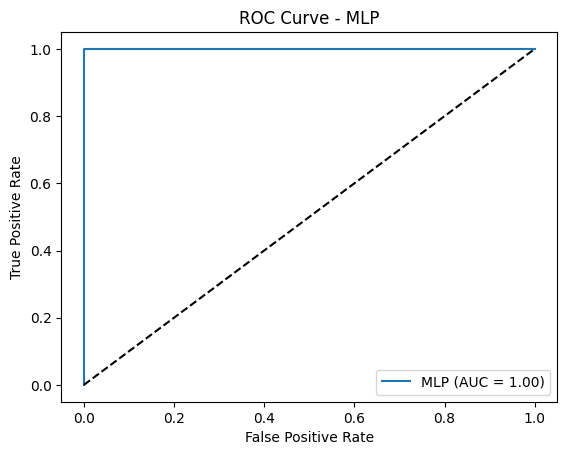


===== Training LSTM =====


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 

===== LSTM =====
Accuracy: 0.8750
              precision    recall  f1-score   support

           0       0.80      0.93      0.86        42
           1       0.90      0.66      0.76        29
           2       0.97      1.00      0.99        33

    accuracy                           0.88       104
   macro avg       0.89      0.86      0.87       104
weighted avg       0.88      0.88      0.87       104



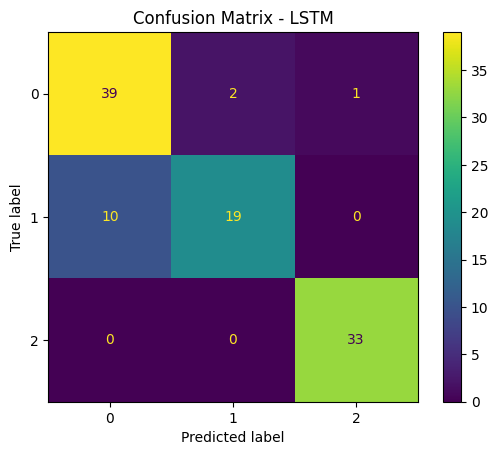

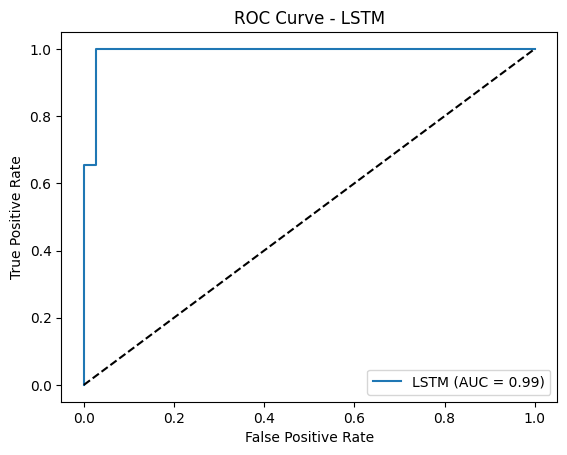


===== Training BiLSTM =====


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/bidirectional.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 148ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step

===== BiLSTM =====
Accuracy: 0.9808
              precision    recall  f1-score   support

           0       0.95      1.00      0.98        42
           1       1.00      0.93      0.96        29
           2       1.00      1.00      1.00        33

    accuracy                           0.98       104
   macro avg       0.98      0.98      0.98       104
weighted avg       0.98      0.98      0.98       104



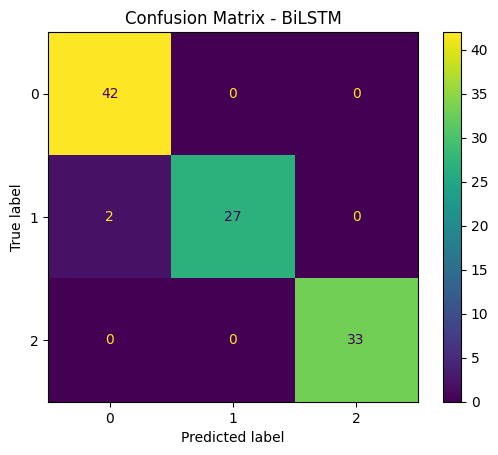

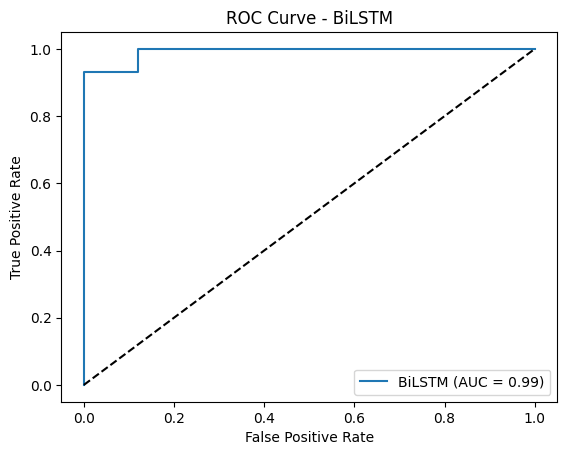


===== Training GRU =====


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 

===== GRU =====
Accuracy: 0.9808
              precision    recall  f1-score   support

           0       0.95      1.00      0.98        42
           1       1.00      0.93      0.96        29
           2       1.00      1.00      1.00        33

    accuracy                           0.98       104
   macro avg       0.98      0.98      0.98       104
weighted avg       0.98      0.98      0.98       104



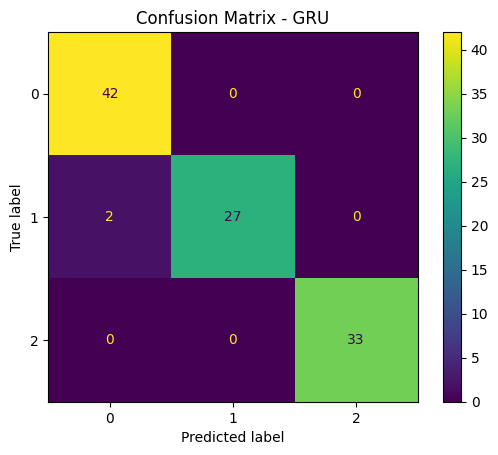

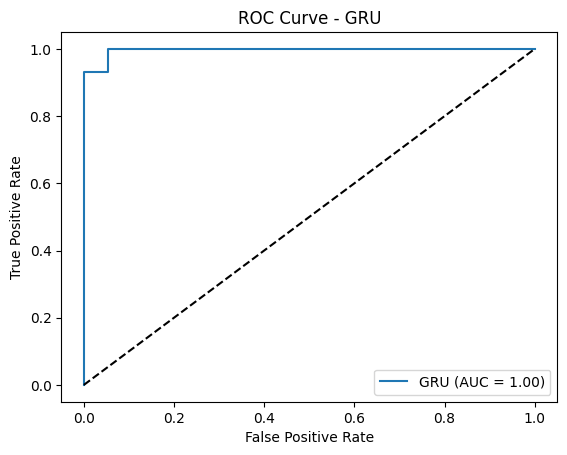


===== Training BiGRU =====


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/bidirectional.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 174ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step

===== BiGRU =====
Accuracy: 0.9808
              precision    recall  f1-score   support

           0       0.95      1.00      0.98        42
           1       1.00      0.93      0.96        29
           2       1.00      1.00      1.00        33

    accuracy                           0.98       104
   macro avg       0.98      0.98      0.98       104
weighted avg       0.98      0.98      0.98       104



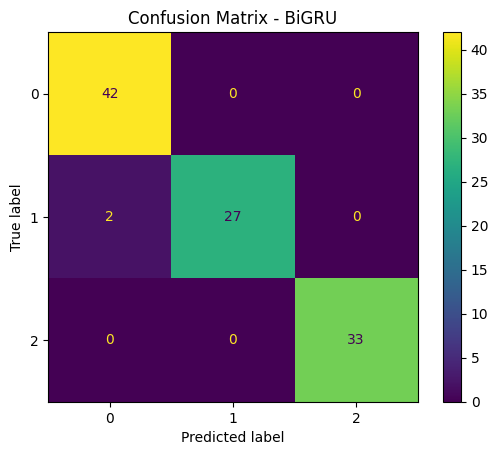

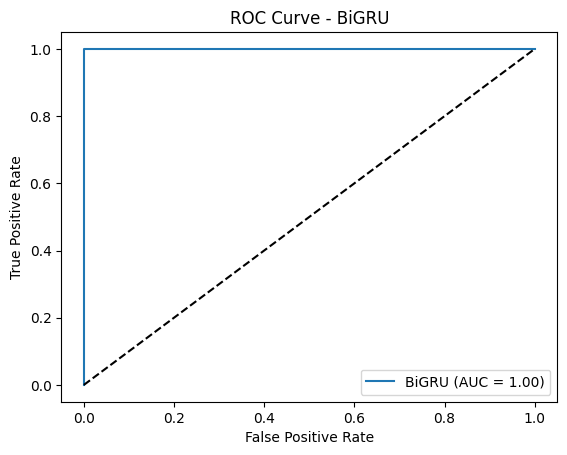


===== Training 1D CNN =====


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 

===== 1D CNN =====
Accuracy: 0.9712
              precision    recall  f1-score   support

           0       0.93      1.00      0.97        42
           1       1.00      0.93      0.96        29
           2       1.00      0.97      0.98        33

    accuracy                           0.97       104
   macro avg       0.98      0.97      0.97       104
weighted avg       0.97      0.97      0.97       104



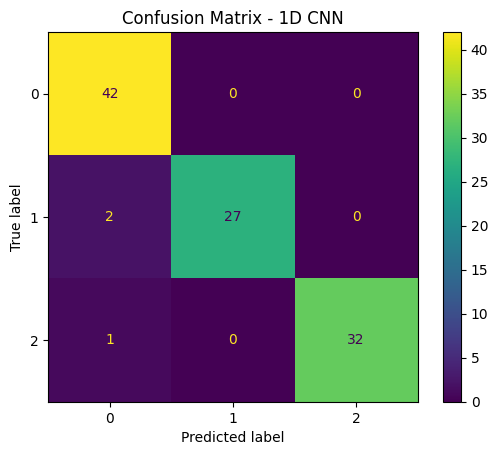

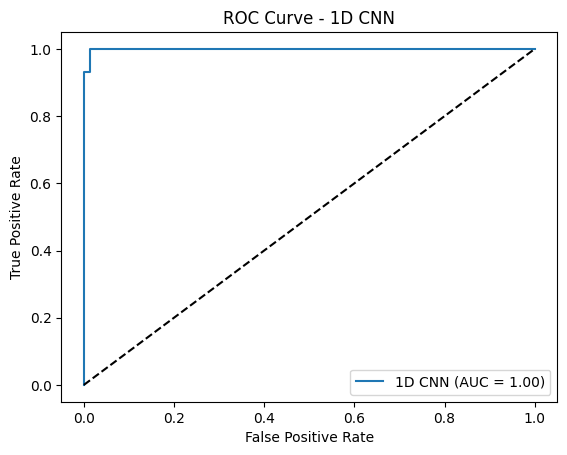

In [14]:
# 8. Deep Learning Models
# ===============================
X_train_rnn = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test_rnn = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

y_train_cat = to_categorical(y_train)

def build_mlp():
    model = Sequential([
        Dense(64, activation='relu', input_dim=X_train.shape[1]),
        Dense(32, activation='relu'),
        Dense(y_train_cat.shape[1], activation='softmax')
    ])
    model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])
    return model

def build_lstm():
    model = Sequential([
        LSTM(64, return_sequences=False, input_shape=(X_train_rnn.shape[1], 1)),
        Dense(y_train_cat.shape[1], activation='softmax')
    ])
    model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])
    return model

def build_bilstm():
    model = Sequential([
        Bidirectional(LSTM(64), input_shape=(X_train_rnn.shape[1], 1)),
        Dense(y_train_cat.shape[1], activation='softmax')
    ])
    model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])
    return model

def build_gru():
    model = Sequential([
        GRU(64, input_shape=(X_train_rnn.shape[1], 1)),
        Dense(y_train_cat.shape[1], activation='softmax')
    ])
    model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])
    return model

def build_bigru():
    model = Sequential([
        Bidirectional(GRU(64), input_shape=(X_train_rnn.shape[1], 1)),
        Dense(y_train_cat.shape[1], activation='softmax')
    ])
    model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])
    return model

def build_cnn():
    model = Sequential([
        Conv1D(64, 3, activation='relu', input_shape=(X_train_rnn.shape[1], 1)),
        Flatten(),
        Dense(y_train_cat.shape[1], activation='softmax')
    ])
    model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])
    return model

dl_models = {
    "MLP": build_mlp,
    "LSTM": build_lstm,
    "BiLSTM": build_bilstm,
    "GRU": build_gru,
    "BiGRU": build_bigru,
    "1D CNN": build_cnn
}

for name, build in dl_models.items():
    print(f"\n===== Training {name} =====")
    model = build()
    model.fit(X_train_rnn if name != "MLP" else X_train, y_train_cat, epochs=10, batch_size=32, verbose=0)
    y_pred = np.argmax(model.predict(X_test_rnn if name != "MLP" else X_test), axis=1)
    y_pred_proba = model.predict(X_test_rnn if name != "MLP" else X_test)
    acc = evaluate_model(name, y_test, y_pred, y_pred_proba)
    results[name] = acc



Best 3 Models: [('Random Forest', 0.9903846153846154), ('Logistic Regression', 0.9807692307692307), ('KNN', 0.9807692307692307)]

===== Ensemble Model =====

===== Ensemble =====
Accuracy: 0.9808
              precision    recall  f1-score   support

           0       0.95      1.00      0.98        42
           1       1.00      0.93      0.96        29
           2       1.00      1.00      1.00        33

    accuracy                           0.98       104
   macro avg       0.98      0.98      0.98       104
weighted avg       0.98      0.98      0.98       104



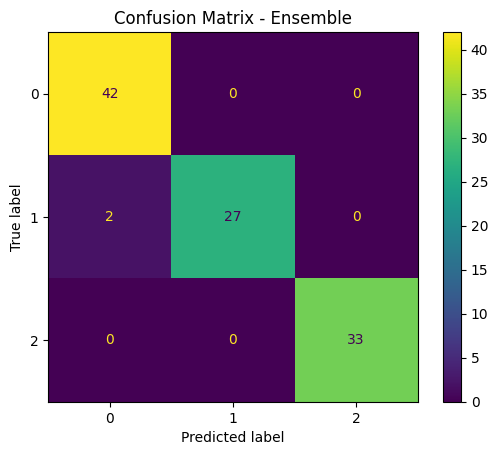

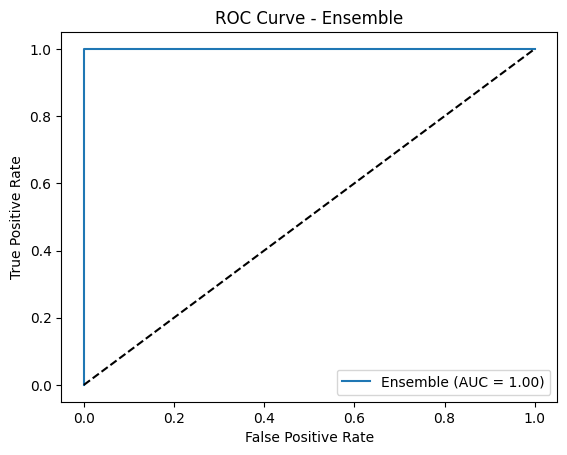

0.9807692307692307

In [15]:
# 9. Ensemble (Top 3)
# ===============================
best_models = sorted(results.items(), key=lambda x: x[1], reverse=True)[:3]
print("\nBest 3 Models:", best_models)

from sklearn.ensemble import VotingClassifier
ensemble = VotingClassifier(estimators=[
    (name, models_ml[name]) for name, _ in best_models if name in models_ml
], voting='soft')

ensemble.fit(X_train, y_train)
ensemble_pred = ensemble.predict(X_test)
ensemble_pred_proba = ensemble.predict_proba(X_test)
print("\n===== Ensemble Model =====")
evaluate_model("Ensemble", y_test, ensemble_pred, ensemble_pred_proba)